<a href="https://colab.research.google.com/github/vinayreddy67/Forecasting-Commodity-Prices/blob/main/commodity_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Preparation

In [ ]:
 import warnings
 warnings.filterwarnings('ignore')

In [ ]:
 import pandas as pd
 import seaborn as sns

In [ ]:
 import matplotlib.pyplot as plt
 import matplotlib.dates as mdates
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LinearRegression
 from sklearn.metrics import mean_squared_error, r2_score
 import numpy as np
 import os

In [ ]:
 df = pd.read_csv("data (1).csv")

In [ ]:
 df

,id,state_id,state_name,district_id,district_name,market_id,market_name,census_state_id,census_state_name,census_district_id,census_district_name,commodity_id,commodity_name,variety,grade,min_price,max_price,modal_price,date
0,61221713,TL,Telangana,6,Medak,396,Zaheerabad,28,ANDHRA PRADESH,535,Medak,1,Wheat,147 Average,NaN,2059.0,2059.0,2059.0,2023-03-01
1,61315087,TL,Telangana,6,Medak,396,Zaheerabad,28,ANDHRA PRADESH,535,Medak,1,Wheat,147 Average,NaN,1910.0,1910.0,1910.0,2023-03-09
2,61717131,TL,Telangana,6,Medak,11,Sadasivpet,28,ANDHRA PRADESH,535,Medak,1,Wheat,147 Average,NaN,2000.0,2421.0,2421.0,2023-04-12
3,61805915,TL,Telangana,6,Medak,11,Sadasivpet,28,ANDHRA PRADESH,535,Medak,1,Wheat,147 Average,NaN,2300.0,2300.0,2300.0,2023-04-19
4,61880319,TL,Telangana,6,Medak,396,Zaheerabad,28,ANDHRA PRADESH,535,Medak,1,Wheat,147 Average,NaN,2229.0,2229.0,2229.0,2023-04-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145797,63853948,TL,Telangana,7,Nalgonda,890,Chandur,28,ANDHRA PRADESH,539,Nalgonda,414,Paddy(Dhan)(Basmati),1121,NaN,2060.0,2060.0,2060.0,2023-10-03
145798,63868558,TL,Telangana,6,Medak,2321,Togguta,28,ANDHRA PRADESH,535,Medak,414,Paddy(Dhan)(Basmati),1121,NaN,2060.0,2060.0,2060.0,2023-10-04
145799,63868559,TL,Telangana,7,Nalgonda,890,Chandur,28,ANDHRA PRADESH,539,Nalgonda,414,Paddy(Dhan)(Basmati),1121,NaN,2060.0,2060.0,2060.0,2023-10-04
145800,63883184,TL,Telangana,6,Medak,2321,Togguta,28,ANDHRA PRADESH,535,Medak,414,Paddy(Dhan)(Basmati),1121,NaN,2060.0,2060.0,2060.0,2023-10-05


In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145802 entries, 0 to 145801
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    145802 non-null  int64  
 1   state_id              145802 non-null  object 
 2   state_name            145802 non-null  object 
 3   district_id           145802 non-null  int64  
 4   district_name         145802 non-null  object 
 5   market_id             145802 non-null  int64  
 6   market_name           145802 non-null  object 
 7   census_state_id       145802 non-null  int64  
 8   census_state_name     145802 non-null  object 
 9   census_district_id    145802 non-null  int64  
 10  census_district_name  145802 non-null  object 
 11  commodity_id          145802 non-null  int64  
 12  commodity_name        145802 non-null  object 
 13  variety               145802 non-null  object 
 14  grade                 9424 non-null    object 
 15  

In [ ]:
 df.drop('grade', axis=1, inplace=True)

In [ ]:
 df.describe()

,id,district_id,market_id,census_state_id,census_district_id,commodity_id,min_price,max_price,modal_price
count,1.458020e+05,145802.000000,145802.000000,145802.0,145802.000000,145802.000000,145802.000000,145802.000000,145802.000000
mean,6.228100e+07,8.572228,1948.360770,28.0,537.954706,84.121308,3157.436218,4104.500247,3704.901156
std,1.061193e+06,6.373244,1946.069341,0.0,4.368491,89.529631,3266.689377,5134.369254,4264.103192
min,6.047971e+07,1.000000,1.000000,28.0,532.000000,1.000000,0.000000,0.000000,2.500000
25%,6.135765e+07,3.000000,877.000000,28.0,536.000000,10.000000,1500.000000,2000.000000,1800.000000
50%,6.224517e+07,7.000000,1087.000000,28.0,537.000000,72.000000,2060.000000,2400.000000,2200.000000
75%,6.318714e+07,11.000000,3643.000000,28.0,539.000000,153.000000,4000.000000,5000.000000,4500.000000
max,6.420072e+07,23.000000,8302.000000,28.0,554.000000,414.000000,72500.000000,130000.000000,76000.000000


In [ ]:
 df.isnull().sum()

id                      0
state_id                0
state_name              0
district_id             0
district_name           0
market_id               0
market_name             0
census_state_id         0
census_state_name       0
census_district_id      0
census_district_name    0
commodity_id            0
commodity_name          0
variety                 0
min_price               0
max_price               0
modal_price             0
date                    0
dtype: int64

In [ ]:
 df.duplicated().sum()

0

In [ ]:
 df.columns

Index(['id', 'state_id', 'state_name', 'district_id', 'district_name',
       'market_id', 'market_name', 'census_state_id', 'census_state_name',
       'census_district_id', 'census_district_name', 'commodity_id',
       'commodity_name', 'variety', 'min_price', 'max_price', 'modal_price',
       'date'],
      dtype='object')

In [ ]:
df.shape

(145802, 18)

2 Data visualization

In [ ]:
grouped_data = df.groupby('commodity_name')['modal_price'].sum().reset_index()
grouped_data

,commodity_name,modal_price
0,Ajwan,2052421.0
1,Alasande Gram,79063.0
2,Alsandikai,128900.0
3,Amaranthus,286100.0
4,Amla(Nelli Kai),969600.0
...,...,...
119,Wheat,61629.0
120,White Pumpkin,214825.0
121,Wood,312135.0
122,Yam,151300.0


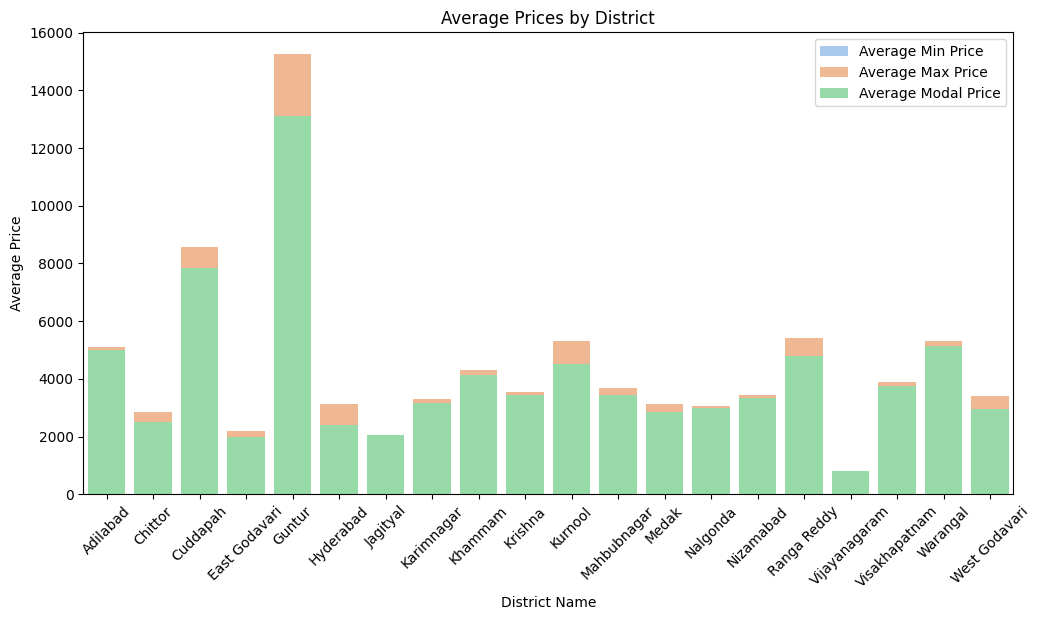

In [ ]:
district_prices = df.groupby('district_name').agg({'min_price': 'mean','max_price': 'mean', 'modal_price': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
colors = sns.color_palette("pastel", 3)
sns.barplot(x='district_name', y='min_price', data=district_prices,label='Average Min Price', color=colors[0])
sns.barplot(x='district_name', y='max_price', data=district_prices,label='Average Max Price', color=colors[1])
sns.barplot(x='district_name', y='modal_price', data=district_prices,label='Average Modal Price', color=colors[2])
plt.xlabel('District Name')
plt.ylabel('Average Price')
plt.title('Average Prices by District')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
commodities = ['Wheat', 'Paddy(Dhan)(Common)', 'Rice', 'Maize','Jowar(Sorghum)',
'Bengal Gram(Gram)(Whole)', 'Black Gram (Urd Beans)(Whole)',
'Green Gram (Moong)(Whole)', 'Groundnut',
'Sesamum(Sesame,Gingelly,Til)', 'Mustard', 'Soyabean', 'Sunflower',
'Cotton', 'Apple', 'Orange', 'Banana', 'Mango', 'Pineapple',
'Grapes', 'Onion', 'Potato', 'Garlic', 'Chili Red', 'Ginger(Dry)',
'Bajra(Pearl Millet/Cumbu)', 'Ragi (Finger Millet)', 'Cauliflower',
'Brinjal', 'Turmeric', 'Coriander(Leaves)',
'Arhar (Tur/Red Gram)(Whole)', 'Safflower', 'Field Pea',
'Chikoos(Sapota)', 'Papaya', 'Water Melon', 'Gur(Jaggery)',
'Mousambi(Sweet Lime)', 'Tomato', 'Cluster beans', 'Bitter gourd',
'Bottle gourd', 'Pumpkin', 'Bhindi(Ladies Finger)', 'Amaranthus',
'Green Chilli', 'Banana - Green', 'Cowpea (Lobia/Karamani)',
'Cotton Seed', 'Corriander seed', 'Kulthi(Horse Gram)',
'Foxtail Millet(Navane)', 'Castor Seed', 'Dry Chillies', 'Ajwan',
'Coconut', 'Sunhemp', 'Sweet Potato', 'Carrot', 'Cabbage',
'Snakeguard', 'Beetroot', 'White Pumpkin', 'Cucumbar(Kheera)',
'Ridgeguard(Tori)', 'Raddish', 'Thondekai', 'Capsicum',
'Alsandikai', 'Chow Chow', 'Drumstick', 'Leafy Vegetable',
'Mango (Raw-Ripe)', 'Knool Khol', 'Lime', 'Jack Fruit', 'Guava',
'Karbuja(Musk Melon)', 'Pomegranate', 'Wood', 'Tamarind Seed',
'Cow', 'Ox', 'Bull', 'Calf', 'He Buffalo', 'She Buffalo',
'Jasmine', 'Kakada', 'Astera', 'Kankambra', 'Marigold(Calcutta)',
'Yam', 'Arhar Dal(Tur Dal)', 'Tamarind Fruit','Bengal Gram Dal (Chana Dal)', 'Black Gram Dal (Urd Dal)',
'Green Gram Dal (Moong Dal)', 'Alasande Gram', 'Bullar',
'Elephant Yam (Suran)', 'Yam (Ratalu)', 'French Beans (Frasbean)',
'Indian Beans (Seam)', 'Little gourd (Kundru)', 'Lemon',
'Groundnut pods (raw)', 'Papaya (Raw)', 'Groundnut (Split)',
'Colacasia', 'Cherry', 'Plum', 'Kinnow', 'Spinach',
'Custard Apple (Sharifa)', 'Amla(Nelli Kai)',
'Ber(Zizyphus/Borehannu)', 'Onion Green', 'Gladiolus Cut Flower',
'Carnation', 'Jarbara', 'Lilly', 'Paddy(Dhan)(Basmati)']
commodity_counts = df[df['commodity_name'].isin(commodities)]
commodity_counts = commodity_counts.groupby(['census_district_name','commodity_name']).size().unstack().fillna(0)


In [ ]:
 commodity_counts

commodity_name,Ajwan,Alasande Gram,Alsandikai,Amaranthus,Amla(Nelli Kai),Apple,Arhar (Tur/Red Gram)(Whole),Arhar Dal(Tur Dal),Astera,Bajra(Pearl Millet/Cumbu),...,Tamarind Seed,Thondekai,Tomato,Turmeric,Water Melon,Wheat,White Pumpkin,Wood,Yam,Yam (Ratalu)
census_district_name,,,,,,,,,,,,,,,,,,,,,
Adilabad,0.0,0.0,38.0,149.0,0.0,0.0,236.0,0.0,0.0,0.0,...,0.0,0.0,305.0,130.0,11.0,8.0,0.0,66.0,0.0,0.0
Chittoor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,951.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
East Godavari,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guntur,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,293.0,0.0,0.0,0.0,0.0,0.0,0.0
Hyderabad,0.0,0.0,0.0,0.0,242.0,277.0,0.0,0.0,276.0,0.0,...,0.0,101.0,991.0,45.0,275.0,0.0,214.0,0.0,80.0,324.0
Karimnagar,0.0,0.0,0.0,0.0,0.0,0.0,201.0,0.0,0.0,0.0,...,0.0,152.0,268.0,286.0,0.0,0.0,0.0,0.0,0.0,0.0
Khammam,0.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0,0.0,0.0,...,0.0,0.0,88.0,0.0,1.0,0.0,0.0,662.0,0.0,0.0
Krishna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kurnool,100.0,0.0,0.0,0.0,0.0,0.0,231.0,0.0,0.0,0.0,...,0.0,0.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


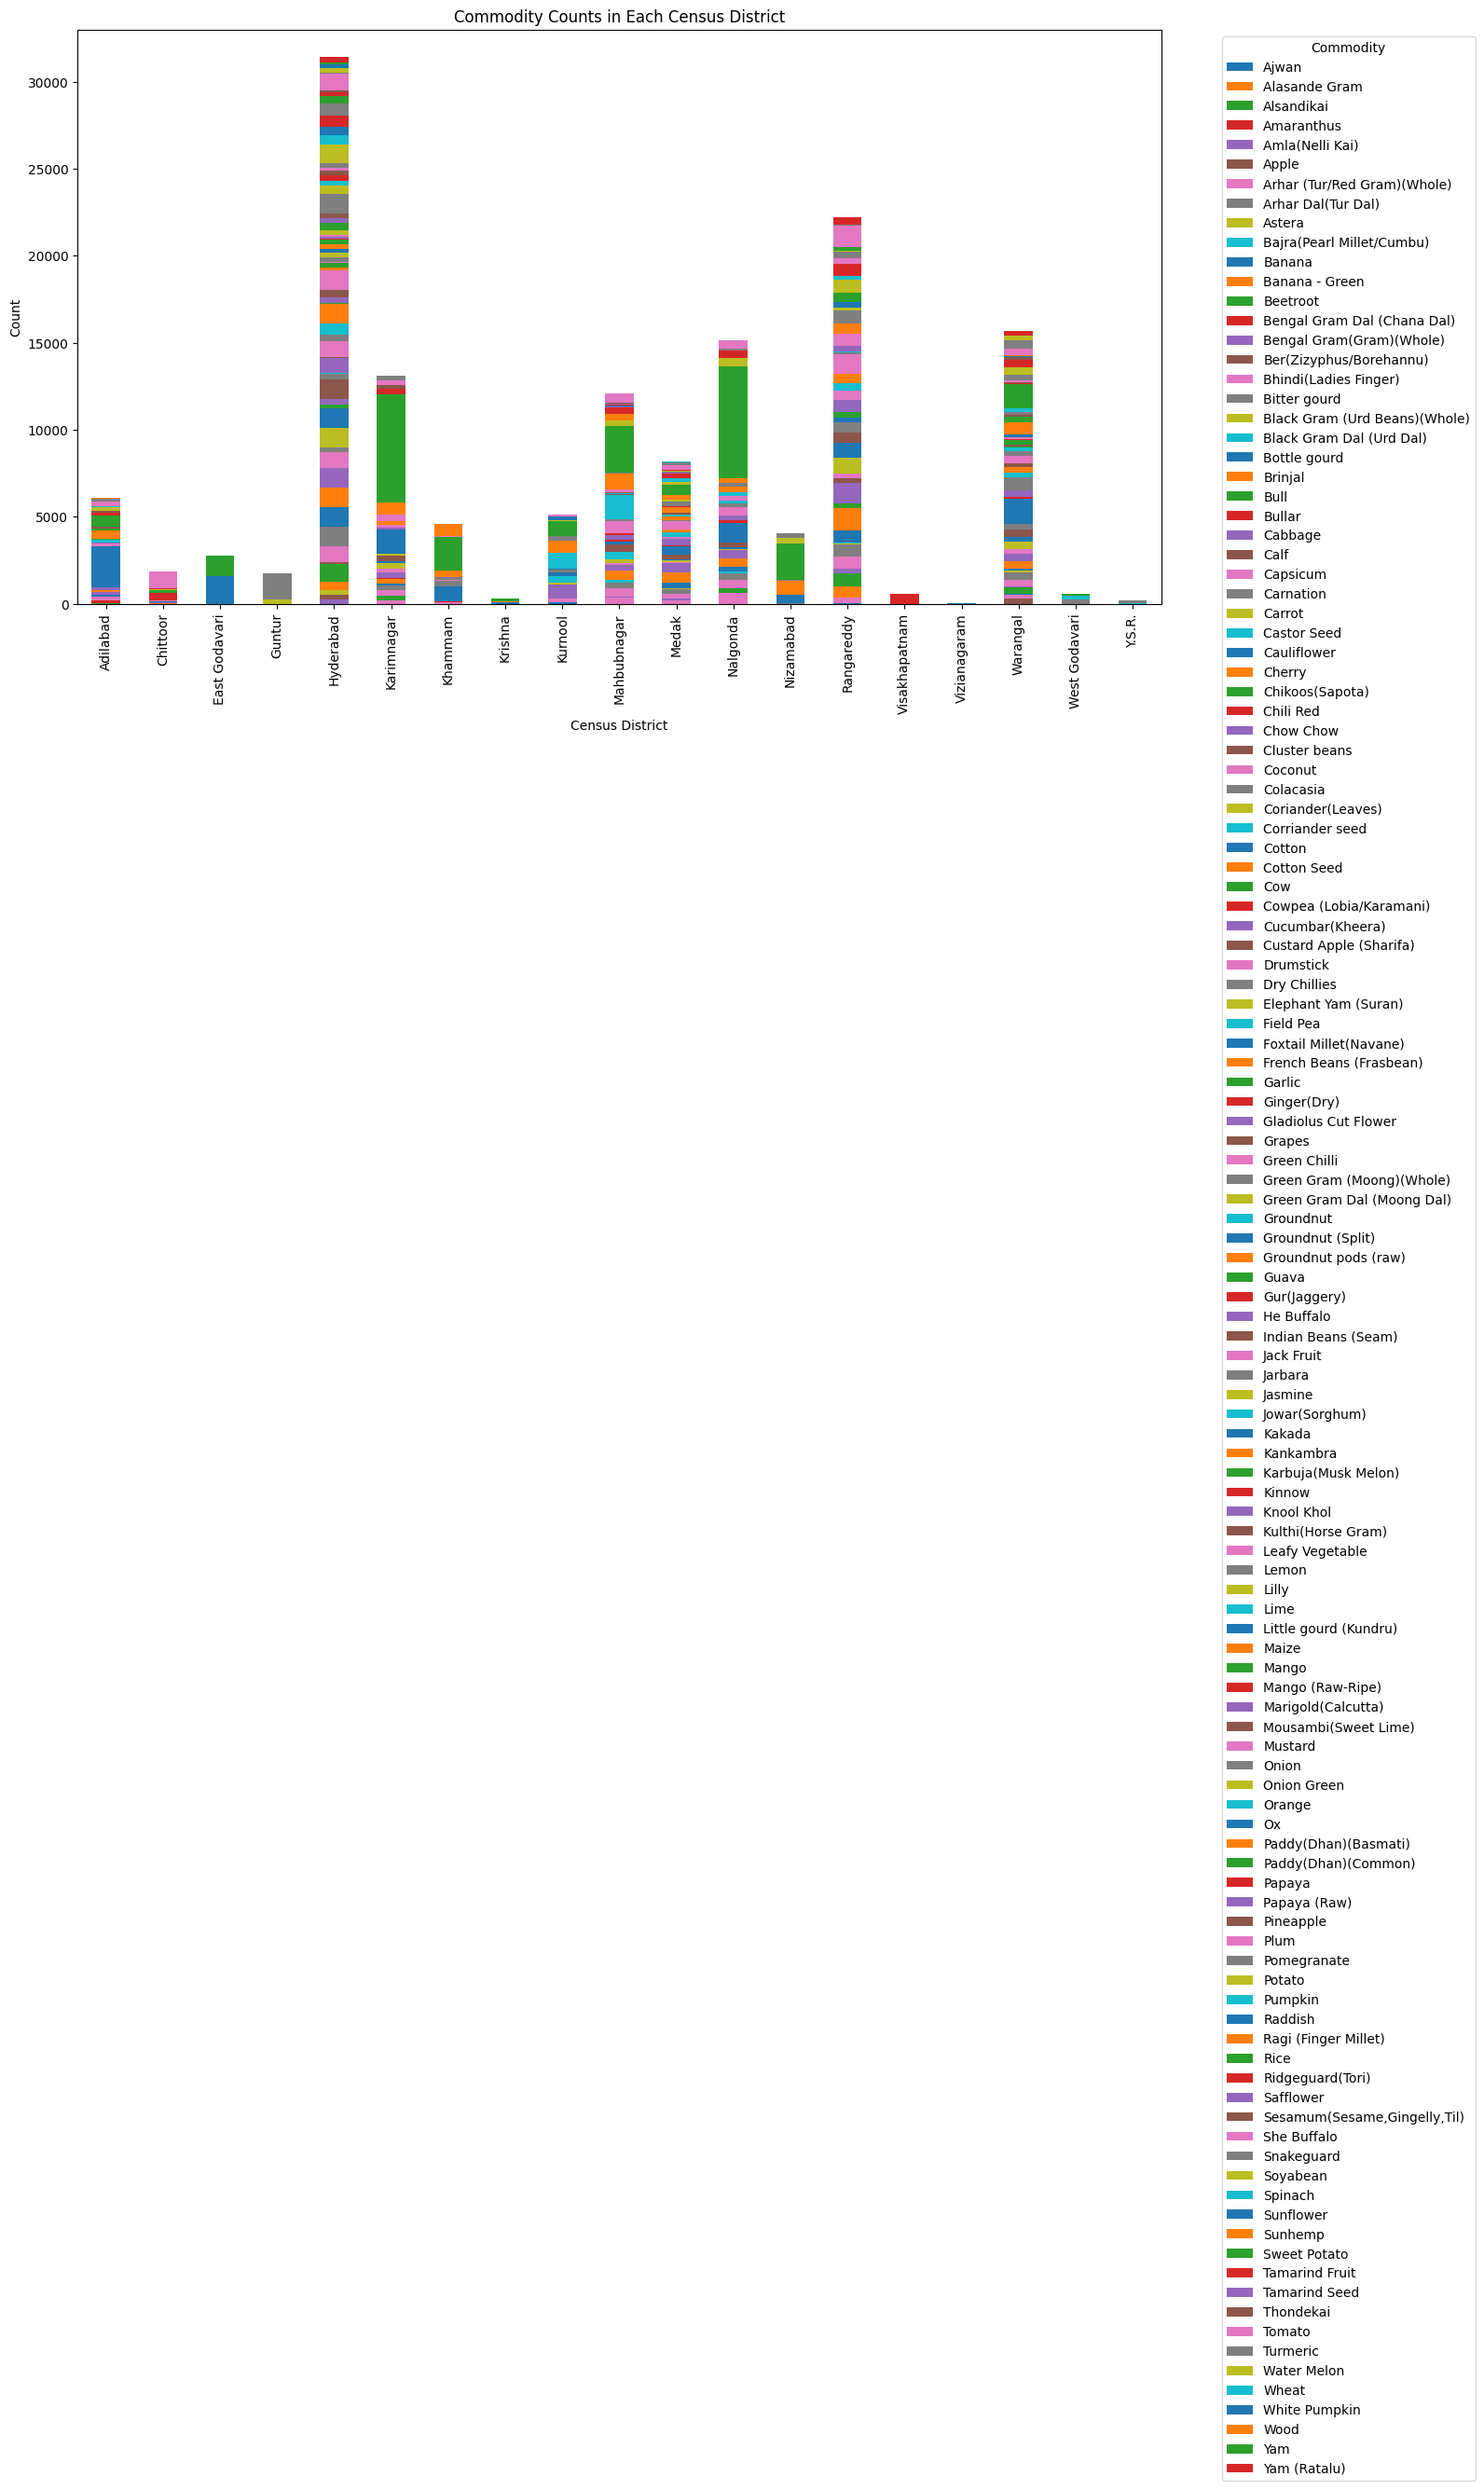

In [ ]:
commodity_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Commodity Counts in Each Census District')
plt.xlabel('Census District')
plt.ylabel('Count')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

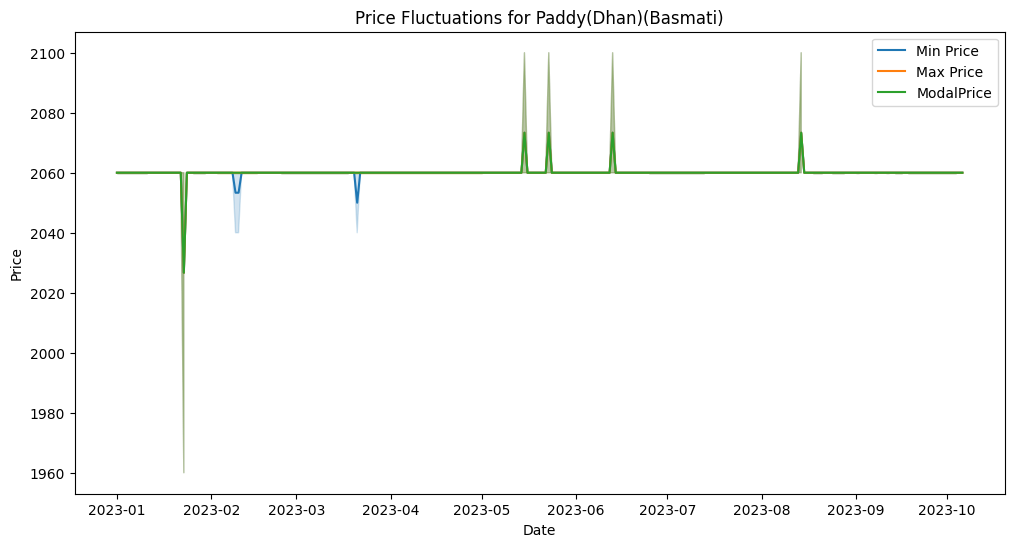

In [ ]:
df['date'] = pd.to_datetime(df['date'])
for commodity in df['commodity_name'].unique():
 commodity_df = df[df['commodity_name'] == commodity]
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='min_price', data=commodity_df, label='Min Price')
sns.lineplot(x='date', y='max_price', data=commodity_df, label='Max Price')
sns.lineplot(x='date', y='modal_price', data=commodity_df, label='ModalPrice')
plt.title(f'Price Fluctuations for {commodity}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


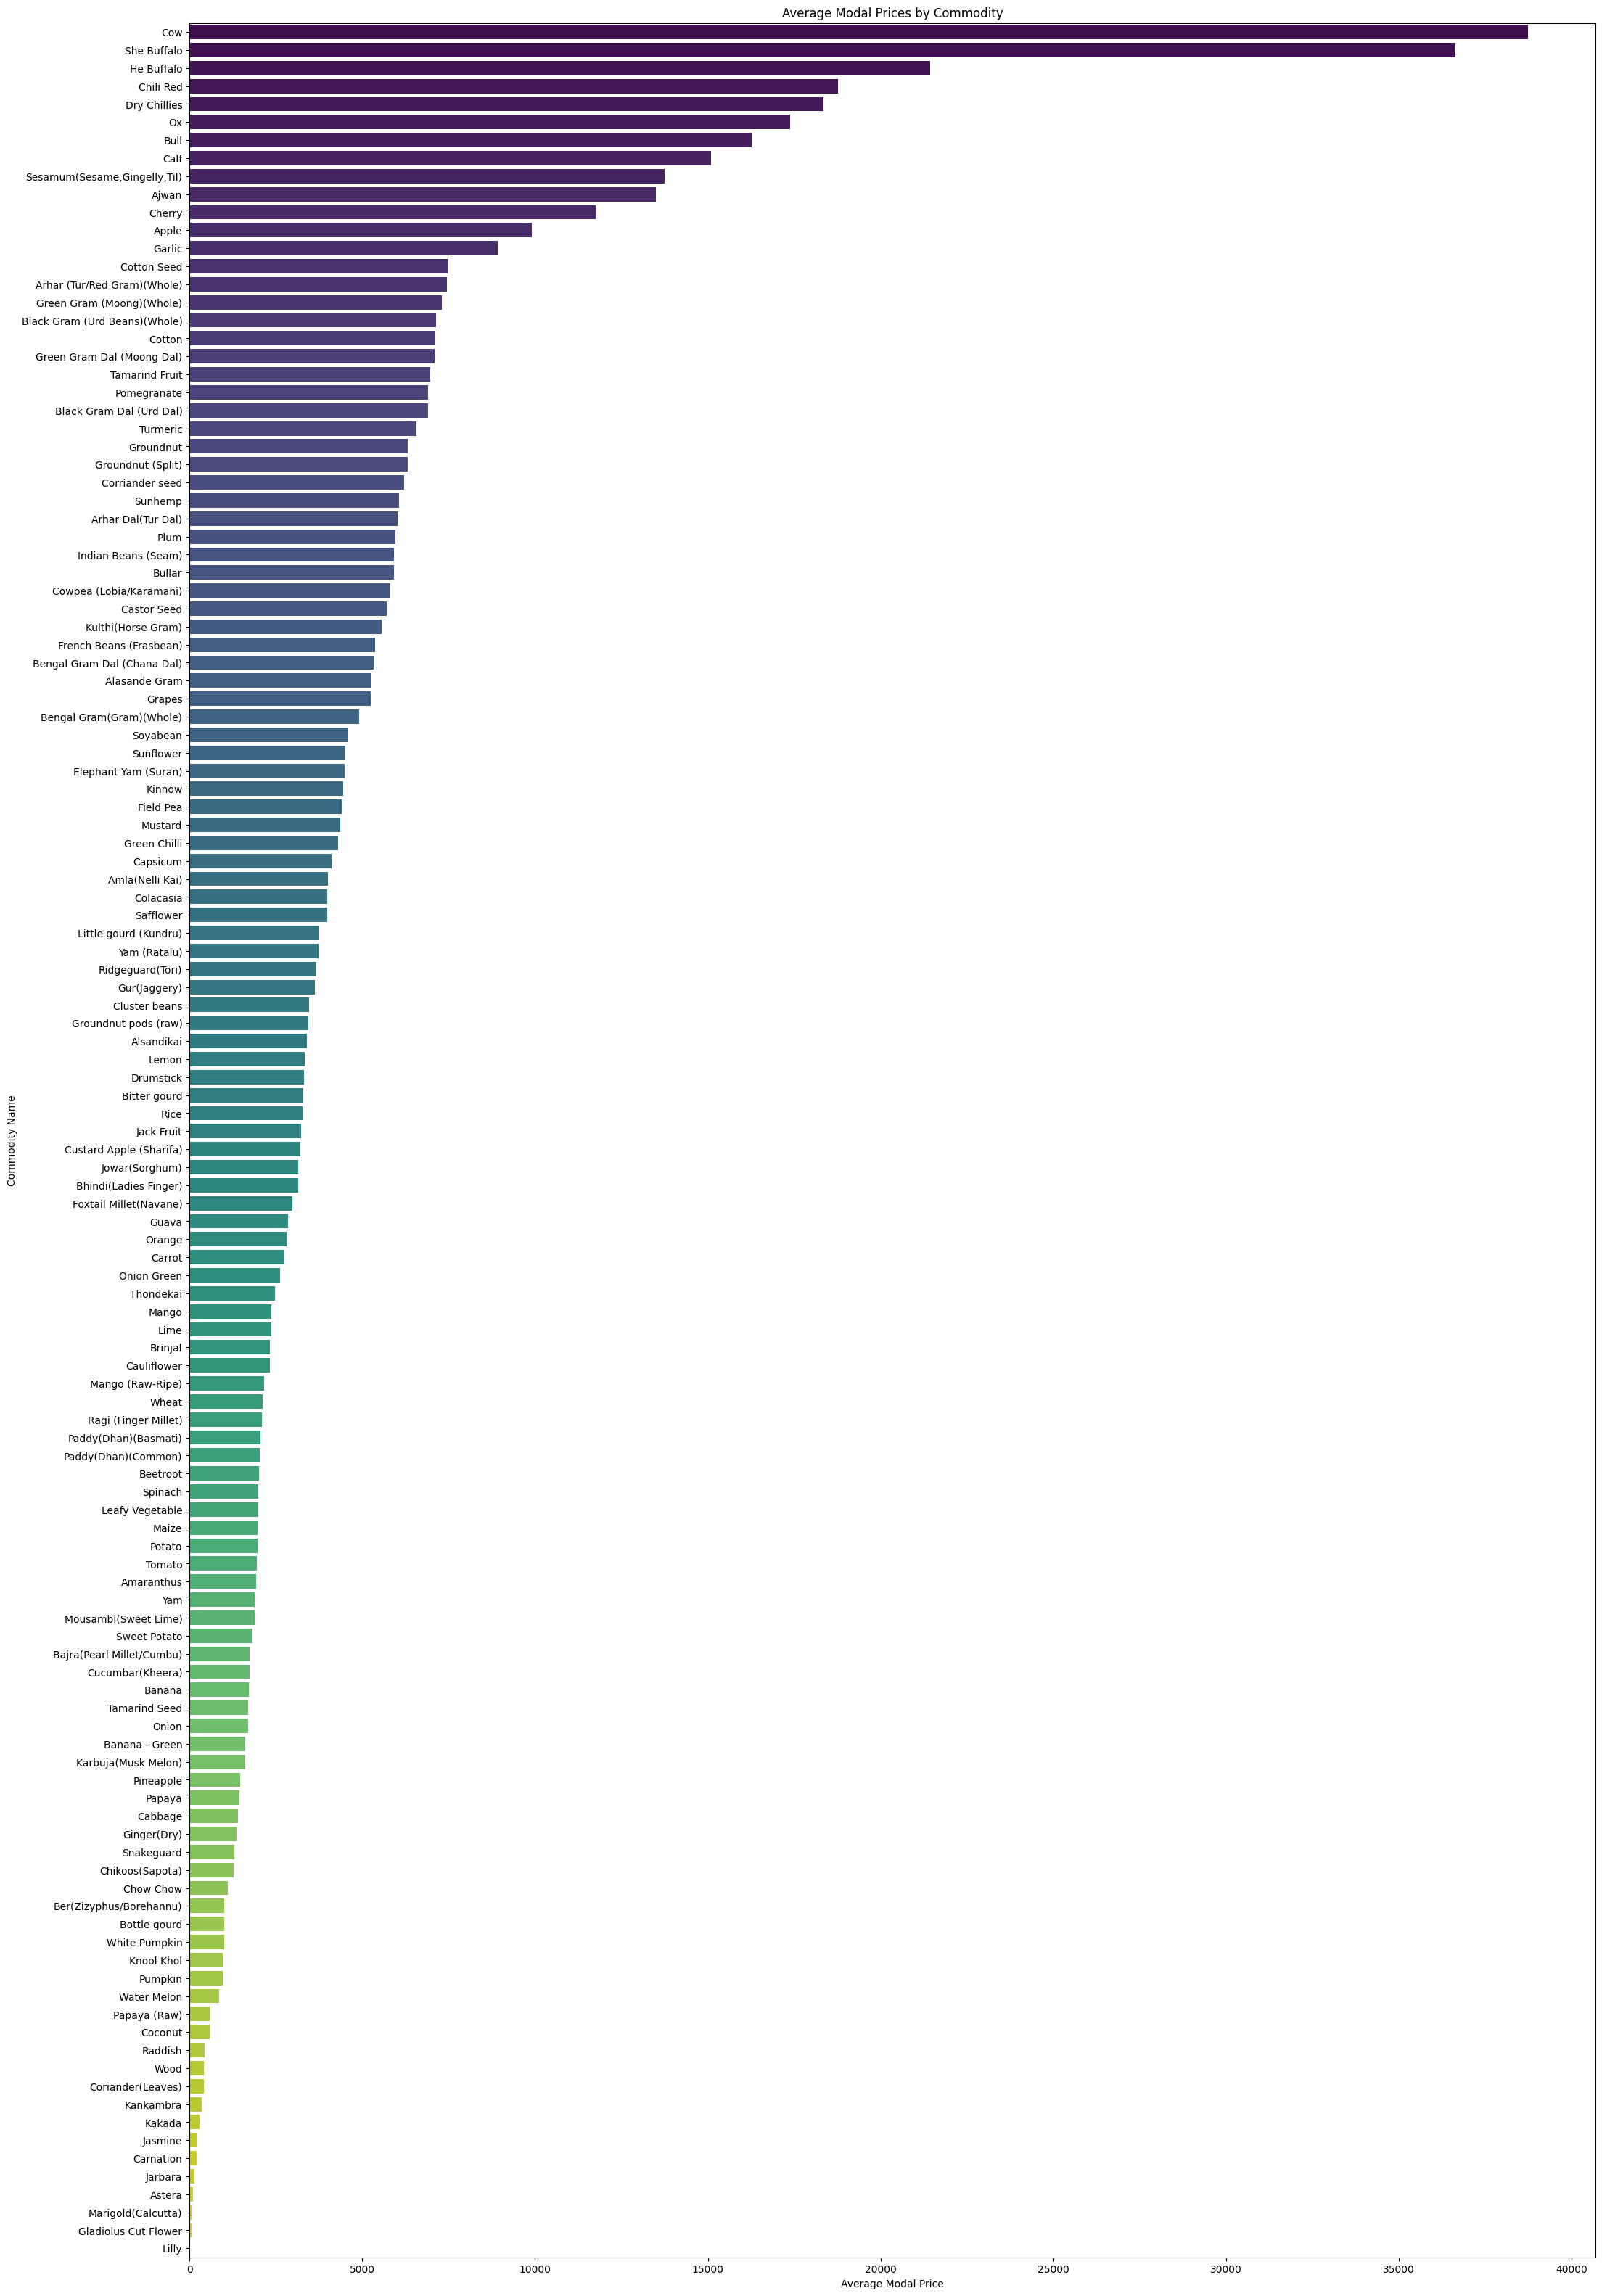

In [ ]:
average_prices = df.groupby('commodity_name')['modal_price'].mean().reset_index()
average_prices = average_prices.sort_values(by='modal_price', ascending=False)
plt.figure(figsize=(25, 40))
sns.barplot(x='modal_price', y='commodity_name', data=average_prices,palette='viridis')
plt.title('Average Modal Prices by Commodity')
plt.xlabel('Average Modal Price')
plt.ylabel('Commodity Name')
plt.show()

In [ ]:
variety_counts = df.groupby(['commodity_name', 'variety']).size().reset_index(name='count')
variety_counts = variety_counts.sort_values(by='count', ascending=False)

In [ ]:
variety_counts

,commodity_name,variety,count
202,Paddy(Dhan)(Common),MTU-1010,7357
193,Paddy(Dhan)(Common),1001,6838
118,Green Chilli,Green Chilly,4971
52,Cabbage,Cabbage,4571
81,Cotton,Cotton (Unginned),4551
...,...,...,...
141,Jowar(Sorghum),Annigeri,1
147,Jowar(Sorghum),Other,1
245,Spinach,Other,1
74,Corriander seed,Other,1


3 Prediction

In [ ]:
unique_commodities = df['commodity_name'].dropna().unique()
output_directory = 'commodity_tables'
os.makedirs(output_directory, exist_ok=True)
for commodity in unique_commodities:
 commodity_data = df[df['commodity_name'] == commodity][['modal_price','date']]
if isinstance(commodity, str):
 file_name = f"{commodity.replace('/', '_')}_table.csv"
 file_path = os.path.join(output_directory, file_name)
 commodity_data.to_csv(file_path, index=False)
 print(f"Table for {commodity} saved as {file_path}")
else:
 print(f"Skipping NaN or non-string value for commodity.")


Table for Paddy(Dhan)(Basmati) saved as commodity_tables/Paddy(Dhan)(Basmati)_table.csv


In [ ]:
output_directory = r"commodity_tables"
commodity_tables = [table for table in os.listdir(output_directory) if not table.startswith('.')]
predictions = []
for table in commodity_tables:
  table_path = os.path.join(output_directory, table)
  commodity_data = pd.read_csv(table_path)
  commodity_data['date'] = pd.to_datetime(commodity_data['date'])
  commodity_data = commodity_data.sort_values(by='date')
  commodity_data.set_index('date', inplace=True)

  if len(commodity_data) < 2:
    print(f" {table} is too short for training.")
    continue

  X = np.array(commodity_data.index.astype(np.int64)).reshape(-1, 1)
  y = commodity_data['modal_price']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
  if len(X_train) == 0:
    print(f" {table} training set.")
    continue

  model = LinearRegression()
  model.fit(X_train, y_train)
  forecast_index = pd.date_range(commodity_data.index[-1] + pd.Timedelta(days=1), periods=3).astype(np.int64)
  forecast_values = model.predict(np.array(forecast_index).reshape(-1, 1))
  prediction_df = pd.DataFrame({'date': pd.to_datetime(forecast_index),'predicted_modal_price': forecast_values})
  prediction_df['commodity'] = table.split('_table.csv')[0]
  predictions.append(prediction_df)

In [ ]:
all_predictions = pd.concat(predictions)
predictions_file = 'commodity_predictions_linear_regression.csv'
all_predictions.to_csv(predictions_file, index=False)
print(f"Predictions saved as {predictions_file}")

Predictions saved as commodity_predictions_linear_regression.csv


4 Prediction Model Data

In [ ]:
df1 = pd.read_csv("commodity_predictions_linear_regression.csv")

In [ ]:
 df1

,date,predicted_modal_price,commodity
0,2023-10-07,2061.391735,Paddy(Dhan)(Basmati)
1,2023-10-08,2061.399671,Paddy(Dhan)(Basmati)
2,2023-10-09,2061.407606,Paddy(Dhan)(Basmati)


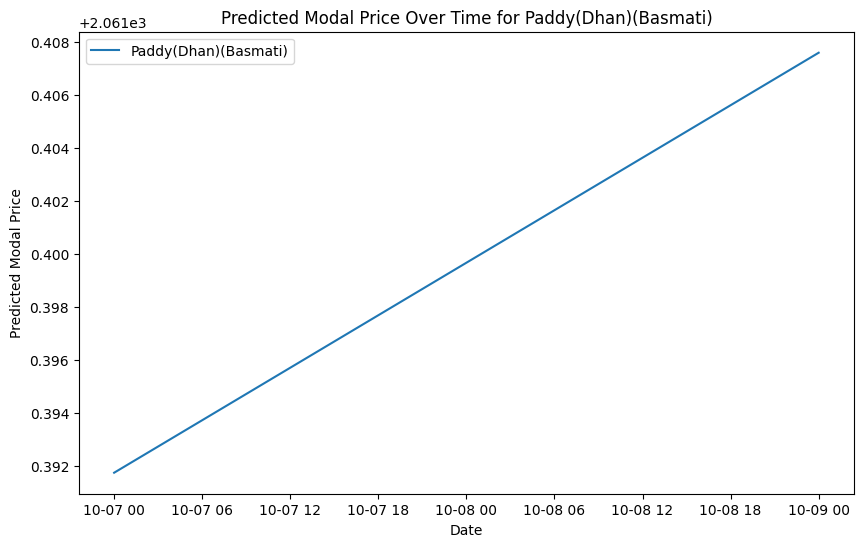

In [ ]:
for commodity in all_predictions['commodity'].unique():
 commodity_predictions = all_predictions[all_predictions['commodity'] ==commodity]
plt.figure(figsize=(10, 6))
plt.plot(commodity_predictions['date'],commodity_predictions['predicted_modal_price'], label=commodity)
plt.title(f'Predicted Modal Price Over Time for {commodity}')
plt.xlabel('Date')
plt.ylabel('Predicted Modal Price')
plt.legend()
plt.show()

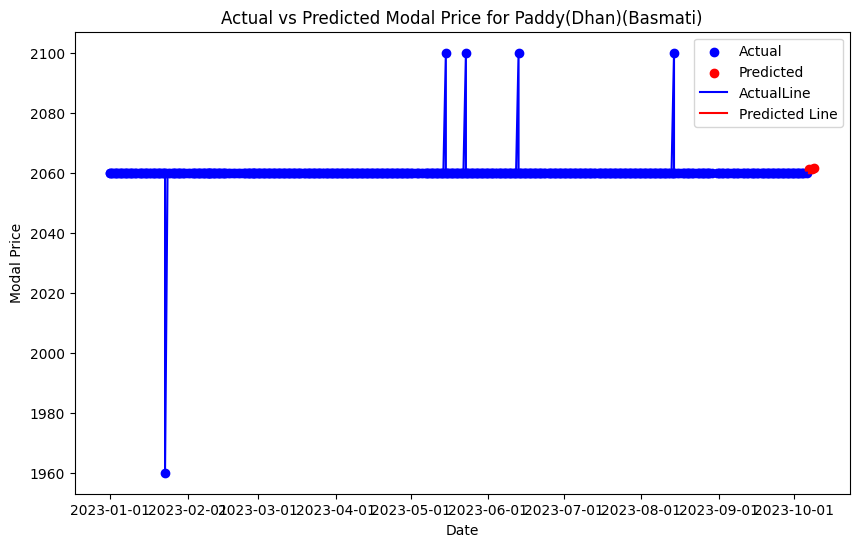

In [ ]:
for commodity in all_predictions['commodity'].unique():
 commodity_predictions = all_predictions[all_predictions['commodity'] ==commodity]
actual_values = pd.read_csv(f"commodity_tables/{commodity}_table.csv")
actual_values['date'] = pd.to_datetime(actual_values['date'])
commodity_predictions['date'] = pd.to_datetime(commodity_predictions['date'])
plt.figure(figsize=(10, 6))
plt.scatter(actual_values['date'], actual_values['modal_price'],label='Actual', color='blue')
plt.scatter(commodity_predictions['date'],commodity_predictions['predicted_modal_price'], label='Predicted',color='red')
plt.plot(actual_values['date'], actual_values['modal_price'], label='ActualLine', color='blue')
plt.plot(commodity_predictions['date'],commodity_predictions['predicted_modal_price'], label='Predicted Line',color='red')
plt.title(f'Actual vs Predicted Modal Price for {commodity}')
plt.xlabel('Date')
plt.ylabel('Modal Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.legend()
plt.show()

5 Training and Splitting

In [ ]:
features = ['district_id', 'market_id', 'commodity_id', 'min_price','max_price']
target = 'modal_price'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
 y_pred = model.predict(X_test)

In [ ]:
 mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Accuracy: {r2*100}')

Mean Squared Error: 385105.0841198771
R-squared Accuracy: 97.83870609329904


In [ ]:
data = df[features + [target]]
data = data.dropna()
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
test_data['predicted_modal_price'] = model.predict(X_test)

In [ ]:
test_data

,district_id,market_id,commodity_id,min_price,max_price,modal_price,predicted_modal_price
80445,10,4308,78,1400.0,1600.0,1500.0,1506.205271
15483,10,1096,2,2060.0,2060.0,2060.0,2105.764689
30333,5,1095,4,1961.0,2061.0,2042.0,2035.842085
72090,6,4398,64,1500.0,3000.0,2250.0,2305.823781
14993,17,877,2,2040.0,2040.0,2040.0,2123.774551
...,...,...,...,...,...,...,...
9436,3,933,2,2040.0,2040.0,2040.0,2051.927820
18550,7,1091,2,2060.0,2060.0,2060.0,2090.564241
133271,20,1003,213,10000.0,20000.0,15000.0,15641.779096
141096,6,4398,312,4000.0,4000.0,4000.0,3958.436697


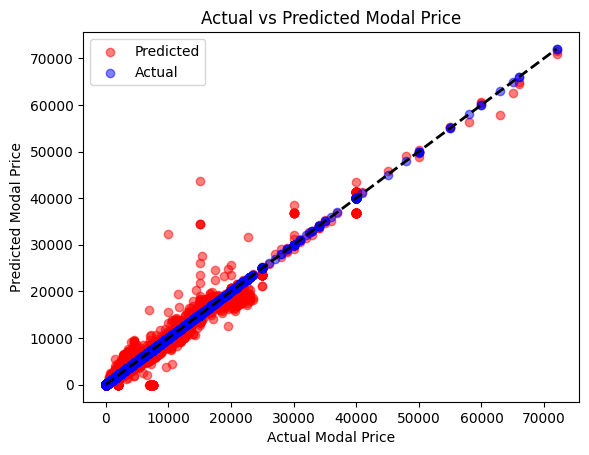

In [ ]:
modal_price = test_data['modal_price']
predicted_modal_price = test_data['predicted_modal_price']
plt.scatter(modal_price, predicted_modal_price, alpha=0.5, c='red',label='Predicted') # Red for predicted values
plt.plot([modal_price.min(), modal_price.max()], [modal_price.min(),modal_price.max()], 'k--', lw=2) # Diagonal line
plt.scatter(modal_price, modal_price, alpha=0.5, c='blue', label='Actual') #Blue for actual values
plt.title('Actual vs Predicted Modal Price')
plt.xlabel('Actual Modal Price')
plt.ylabel('Predicted Modal Price')
plt.legend()
plt.show()

6 Saveing Trained Model

In [ ]:
import joblib
joblib.dump(model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

In [ ]:
model_path = 'linear_regression_model.joblib'
model = joblib.load(model_path)
feature1 = 1.0
feature2 = 2.0
feature3 = 3.0
feature4 = 4.0
def predict_price(commodity, date):
 features = np.array([[feature1, feature2, feature3, feature4, pd.to_datetime(date).timestamp()]])
 predicted_price = model.predict(features)[0]
 return predicted_price

In [ ]:
commodities = ['Wheat', 'Paddy(Dhan)(Common)', 'Rice', 'Maize','Jowar(Sorghum)',
'Bengal Gram(Gram)(Whole)', 'Black Gram (Urd Beans)(Whole)',
'Green Gram (Moong)(Whole)', 'Groundnut',
'Sesamum(Sesame,Gingelly,Til)', 'Mustard', 'Soyabean', 'Sunflower',
'Cotton', 'Apple', 'Orange', 'Banana', 'Mango', 'Pineapple',
'Grapes', 'Onion', 'Potato', 'Garlic', 'Chili Red', 'Ginger(Dry)',
'Bajra(Pearl Millet/Cumbu)', 'Ragi (Finger Millet)', 'Cauliflower',
'Brinjal', 'Turmeric', 'Coriander(Leaves)',
'Arhar (Tur/Red Gram)(Whole)', 'Safflower', 'Field Pea',
'Chikoos(Sapota)', 'Papaya', 'Water Melon', 'Gur(Jaggery)',
'Mousambi(Sweet Lime)', 'Tomato', 'Cluster beans', 'Bitter gourd',
'Bottle gourd', 'Pumpkin', 'Bhindi(Ladies Finger)', 'Amaranthus',
'Green Chilli', 'Banana - Green', 'Cowpea (Lobia/Karamani)',
'Cotton Seed', 'Corriander seed', 'Kulthi(Horse Gram)',
'Foxtail Millet(Navane)', 'Castor Seed', 'Dry Chillies', 'Ajwan',
'Coconut', 'Sunhemp', 'Sweet Potato', 'Carrot', 'Cabbage',
'Snakeguard', 'Beetroot', 'White Pumpkin', 'Cucumbar(Kheera)',
'Ridgeguard(Tori)', 'Raddish', 'Thondekai', 'Capsicum',
'Alsandikai', 'Chow Chow', 'Drumstick', 'Leafy Vegetable',
'Mango (Raw-Ripe)', 'Knool Khol', 'Lime', 'Jack Fruit', 'Guava',
'Karbuja(Musk Melon)', 'Pomegranate', 'Wood', 'Tamarind Seed',
'Cow', 'Ox', 'Bull', 'Calf', 'He Buffalo', 'She Buffalo',
'Jasmine', 'Kakada', 'Astera', 'Kankambra', 'Marigold(Calcutta)',
'Yam', 'Arhar Dal(Tur Dal)', 'Tamarind Fruit',
'Bengal Gram Dal (Chana Dal)', 'Black Gram Dal (Urd Dal)',
'Green Gram Dal (Moong Dal)', 'Alasande Gram', 'Bullar',
'Elephant Yam (Suran)', 'Yam (Ratalu)', 'French Beans (Frasbean)',
'Indian Beans (Seam)', 'Little gourd (Kundru)', 'Lemon',
'Groundnut pods (raw)', 'Papaya (Raw)', 'Groundnut (Split)',
'Colacasia', 'Cherry', 'Plum', 'Kinnow', 'Spinach',
'Custard Apple (Sharifa)', 'Amla(Nelli Kai)',
'Ber(Zizyphus/Borehannu)', 'Onion Green', 'Gladiolus Cut Flower',
'Carnation', 'Jarbara', 'Lilly', 'Paddy(Dhan)(Basmati)']
print(commodities)

['Wheat', 'Paddy(Dhan)(Common)', 'Rice', 'Maize', 'Jowar(Sorghum)', 'Bengal Gram(Gram)(Whole)', 'Black Gram (Urd Beans)(Whole)', 'Green Gram (Moong)(Whole)', 'Groundnut', 'Sesamum(Sesame,Gingelly,Til)', 'Mustard', 'Soyabean', 'Sunflower', 'Cotton', 'Apple', 'Orange', 'Banana', 'Mango', 'Pineapple', 'Grapes', 'Onion', 'Potato', 'Garlic', 'Chili Red', 'Ginger(Dry)', 'Bajra(Pearl Millet/Cumbu)', 'Ragi (Finger Millet)', 'Cauliflower', 'Brinjal', 'Turmeric', 'Coriander(Leaves)', 'Arhar (Tur/Red Gram)(Whole)', 'Safflower', 'Field Pea', 'Chikoos(Sapota)', 'Papaya', 'Water Melon', 'Gur(Jaggery)', 'Mousambi(Sweet Lime)', 'Tomato', 'Cluster beans', 'Bitter gourd', 'Bottle gourd', 'Pumpkin', 'Bhindi(Ladies Finger)', 'Amaranthus', 'Green Chilli', 'Banana - Green', 'Cowpea (Lobia/Karamani)', 'Cotton Seed', 'Corriander seed', 'Kulthi(Horse Gram)', 'Foxtail Millet(Navane)', 'Castor Seed', 'Dry Chillies', 'Ajwan', 'Coconut', 'Sunhemp', 'Sweet Potato', 'Carrot', 'Cabbage', 'Snakeguard', 'Beetroot', 'Wh

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
commodity_name = input("Enter the commodity name: ")
specific_date = input("Enter the specific date (YYYY-MM-DD): ")

In [ ]:
predicted_price = predict_price(commodity_name, specific_date)
first_four_digits = str(predicted_price)
print(f'Predicted price for {commodity_name} on {specific_date}: {first_four_digits} price of total market cap')